# Dependencies

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

### Loading dataset

In [3]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
df = df.loc[0:1000]

In [5]:
df.isnull().sum()

UserName           0
ScreenName         0
Location         206
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [6]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [7]:
def clean_stopword(text):
#     print([x for x in word_tokenize(text) if x not in stopwords.words('english')])
    return ( ' '.join([x for x in word_tokenize(text) if x not in stopwords.words('english')]) )

In [8]:
pd.Series(df.OriginalTweet[1]).apply(clean_stopword)

0    advice Talk neighbours family exchange phone n...
dtype: object

In [9]:
df.OriginalTweet[1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [10]:
df.loc[:, 'OriginalTweet'] = df['OriginalTweet'].apply(clean_stopword)

C:\Users\Nemo\AppData\Local\Temp\ipykernel_16028\2434622897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'OriginalTweet'] = df['OriginalTweet'].apply(clean_stopword)


# EDA

In [11]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
# df = df.loc[:1000].dropna()

In [12]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [13]:
df['Length'] = df['OriginalTweet'].apply(len)

In [14]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Length
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111


In [15]:
df.loc[:, 'Sentiment'] = pd.Categorical(df['Sentiment'], ['Extremely Negative',  'Negative', 'Neutral', 'Positive'
                                                   , 'Extremely Positive'])

In [16]:
df.Sentiment.unique()

['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']
Categories (5, object): ['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

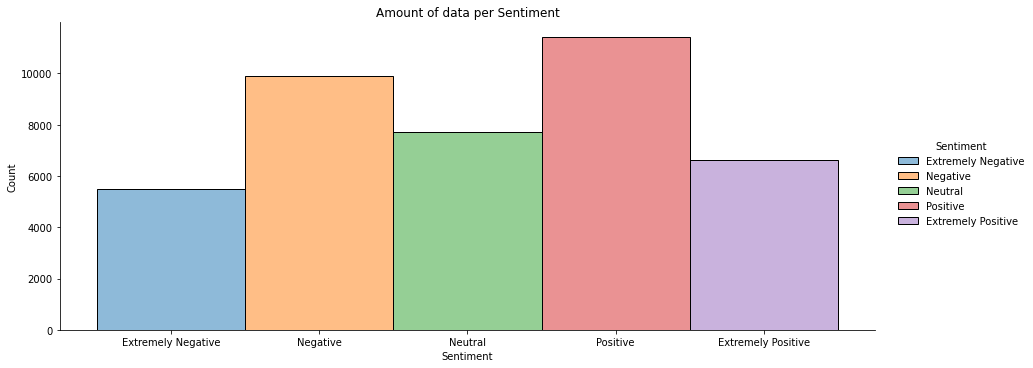

In [17]:
sns.displot(df, x='Sentiment', aspect=2.5, hue='Sentiment')
plt.title('Amount of data per Sentiment')
plt.show()

In [18]:
df['Sentiment'].value_counts().to_frame()

,Sentiment
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


### Data Distribution per Sentiment (Percentage)

In [19]:
sentiment_percentage = (df['Sentiment'].value_counts() / df.shape[0] * 100).to_frame()
sentiment_percentage.columns = ['Percentage']
sentiment_percentage['Percentage'] = sentiment_percentage['Percentage'].apply(lambda x: f'{x: .2f}%')
sentiment_percentage

,Percentage
Positive,27.75%
Negative,24.10%
Neutral,18.74%
Extremely Positive,16.09%
Extremely Negative,13.32%


### Average sentence length  per sentiment

In [20]:
sentiment_len = df.groupby('Sentiment')['Length'].mean().to_frame().reset_index()
sentiment_len

,Sentiment,Length
0,Extremely Negative,221.479839
1,Negative,203.334174
2,Neutral,168.160897
3,Positive,207.056558
4,Extremely Positive,228.237470


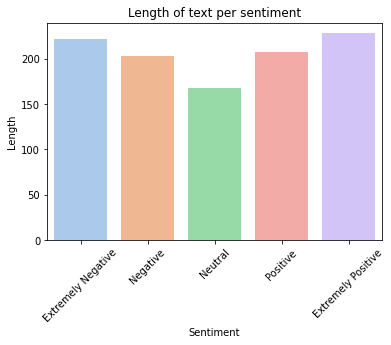

In [21]:
sns.barplot(sentiment_len, x='Sentiment', y='Length', palette='pastel', width=.8)
plt.xticks(rotation=45)
plt.title('Length of text per sentiment')
plt.show()

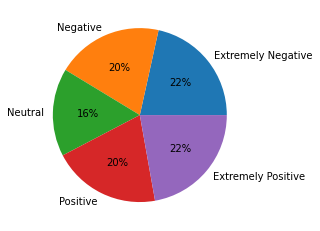

In [22]:
plt.pie(sentiment_len.Length, labels=sentiment_len.Sentiment, autopct='%.0f%%')
plt.show()

In [23]:
df = pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
df['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df['TweetAt'] = df['TweetAt'].dt.strftime('%d-%m-%Y')
df = df.set_index('TweetAt')
df.index = pd.to_datetime(df.index)
df.head()

c:\users\nemo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\nemo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '17-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\nemo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\tools\datetimes.py:1056: UserWarning: Parsing '18-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\nemo\appdata\local\programs\python\python38\lib\site-packages\panda

,UserName,ScreenName,Location,OriginalTweet,Sentiment
TweetAt,,,,,
2020-03-16,3799,48751,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
2020-03-16,3800,48752,UK,advice Talk to your neighbours family to excha...,Positive
2020-03-16,3801,48753,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
2020-03-16,3802,48754,NaN,My food stock is not the only one which is emp...,Positive
2020-03-16,3803,48755,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## What month has the most tweets

In [24]:
df.resample('m').size().sort_values(ascending=False)

TweetAt
2020-03-31    26309
2020-04-30     2479
2020-08-31     1881
2020-07-31     1843
2020-06-30     1742
2020-09-30     1471
2020-05-31     1131
2020-10-31     1005
2020-02-29      954
2020-11-30      909
2020-12-31      803
2020-01-31      630
dtype: int64

## Which month has the most Extremely negative tweets

In [25]:
df.groupby([df.index.month, 'Sentiment']).size().unstack()

Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
TweetAt,,,,,
1,90,89,156,125,170
2,119,141,242,201,251
3,3707,4111,6509,4740,7242
4,328,414,562,461,714
5,120,208,262,235,306
6,207,281,423,360,471
7,227,287,434,374,521
8,214,335,409,365,558
9,159,288,309,285,430


In [26]:
df.groupby([pd.Grouper(freq='M'), 'Sentiment']).size().unstack()

Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
TweetAt,,,,,
2020-01-31,90,89,156,125,170
2020-02-29,119,141,242,201,251
2020-03-31,3707,4111,6509,4740,7242
2020-04-30,328,414,562,461,714
2020-05-31,120,208,262,235,306
2020-06-30,207,281,423,360,471
2020-07-31,227,287,434,374,521
2020-08-31,214,335,409,365,558
2020-09-30,159,288,309,285,430


In [27]:
df.groupby([pd.Grouper(freq='M'), 'Sentiment']).size().unstack().sort_values('Extremely Negative', ascending=False)['Extremely Negative'].to_frame()

,Extremely Negative
TweetAt,
2020-03-31,3707
2020-04-30,328
2020-07-31,227
2020-08-31,214
2020-06-30,207
2020-09-30,159
2020-05-31,120
2020-02-29,119
2020-10-31,115
